In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# cv2 to matplotlib
def cv2mat(img):
    g,b,r = cv2.split(img)
    ret = cv2.merge([r,b,g])
    return ret

def cv_show(img):
    plt.imshow(cv2mat(img))
    

def cv_show1(img,name="image"):
    cv2.imshow(name,img)
    cv2.waitKey() #ms 不输入代表任意键销毁窗口
    cv2.destroyAllWindows()

## 轮廓处理流程

127.0
轮廓数 (2579,)


e:\app\anaconda3\envs\py3.6.3\lib\site-packages\ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


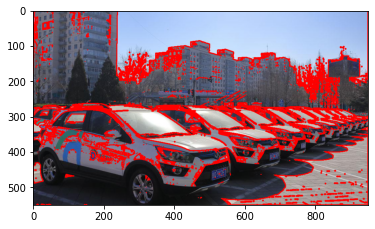

In [27]:
# 导入图片
img_car = cv2.imread("01_Picture/08_Car.png")
img_car_gray = cv2.cvtColor(img_car, cv2.COLOR_BGR2GRAY)
cv_show1(img_car_gray)

# 二值处理
threshold, img_car_binary  = cv2.threshold(img_car_gray, 127, 255, cv2.THRESH_BINARY)
cv_show1(img_car_binary)
print(threshold)

# 轮廓检测
binary, contours, hierarchy = cv2.findContours(img_car_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("轮廓数",np.array(contours).shape)

# 绘制轮廓
img_car_draw = img_car.copy()
img_contours = cv2.drawContours(img_car_draw, contours, -1, (0,0,255), 2)
cv_show(img_contours)

Text(0.5, 1.0, 'mode=retr_ccomp')

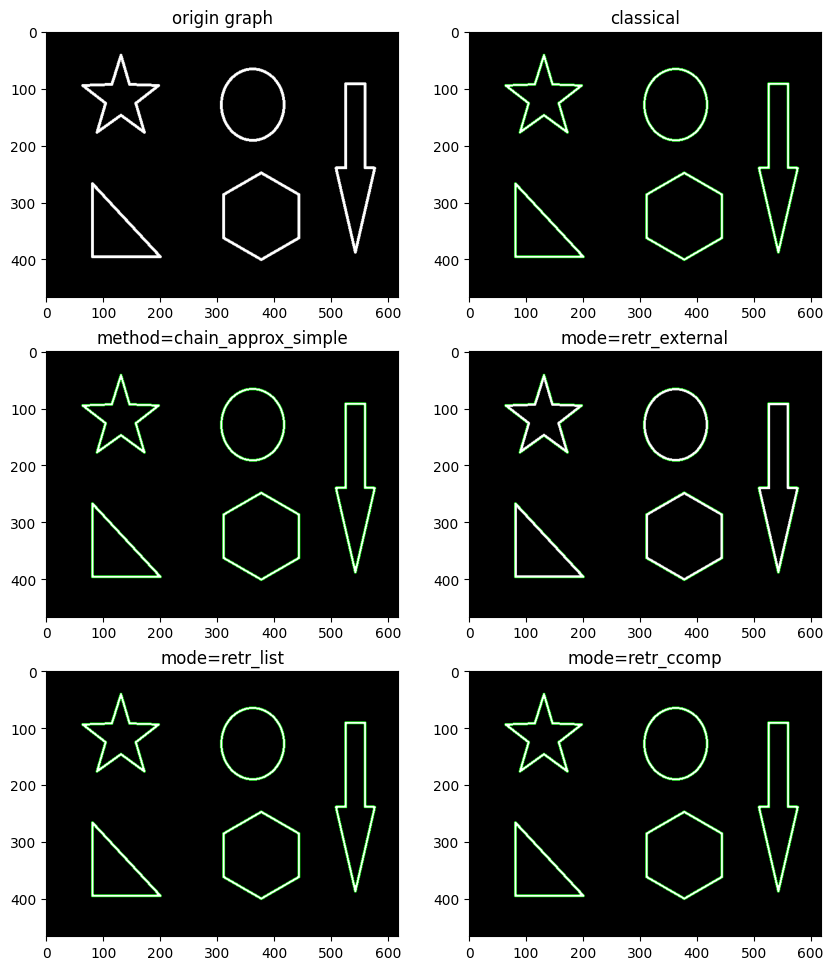

In [61]:
img_contour = cv2.imread("01_Picture/10_contours.png")
img_contour_gray = cv2.cvtColor(img_contour, cv2.COLOR_BGR2GRAY)
threshold,img_contour_binary = cv2.threshold(img_contour_gray, 127, 255, cv2.THRESH_BINARY)

binary, contours, hierarchy = cv2.findContours(img_contour_binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
img_contour_draw = img_contour.copy()
img_contours_1 = cv2.drawContours(img_contour_draw, contours, -1, (0,255,0), 1)

binary, contours, hierarchy = cv2.findContours(img_contour_binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
img_contour_draw = img_contour.copy()
img_contours_2 = cv2.drawContours(img_contour_draw, contours, -1, (0,255,0), 1)

binary, contours, hierarchy = cv2.findContours(img_contour_binary, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
img_contour_draw = img_contour.copy()
img_contours_3 = cv2.drawContours(img_contour_draw, contours, -1, (0,255,0), 1)

binary, contours, hierarchy = cv2.findContours(img_contour_binary, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_NONE)
img_contour_draw = img_contour.copy()
img_contours_4 = cv2.drawContours(img_contour_draw, contours, -1, (0,255,0), 1)

binary, contours, hierarchy = cv2.findContours(img_contour_binary, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_NONE)
img_contour_draw = img_contour.copy()
img_contours_5 = cv2.drawContours(img_contour_draw, contours, -1, (0,255,0), 1)

plt.figure(figsize=(10,12), dpi=100)
plt.subplot(321)
cv_show(img_contour)
plt.title("origin graph")
plt.subplot(322)
cv_show(img_contours_1)
plt.title("classical")
plt.subplot(323)
cv_show(img_contours_2)
plt.title("method=chain_approx_simple")
plt.subplot(324)
cv_show(img_contours_3)
plt.title("mode=retr_external")
plt.subplot(325)
cv_show(img_contours_4)
plt.title("mode=retr_list")
plt.subplot(326)
cv_show(img_contours_5)
plt.title("mode=retr_ccomp")

## 轮廓特征提取

437.9482651948929


8500.5

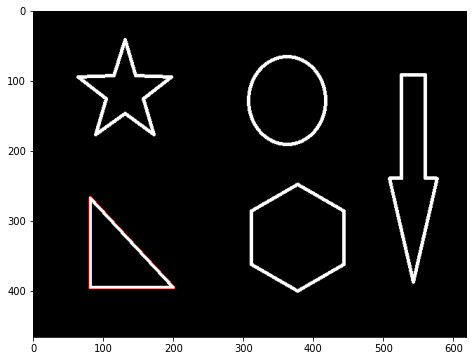

In [79]:
cnt1 = contours[0]

# 第一条曲线的周长和面积
img_contour_draw = img_contour.copy()
img_contour_1 = cv2.drawContours(img_contour_draw, contours, 0, (0,0,255),1)
plt.figure(figsize=(8,6))
cv_show(img_contour_1)

# 周长
print(cv2.arcLength(cnt1,True)) # True 闭合曲线
# 面积
cv2.contourArea(cnt1)

395.8061298131943


6767.5

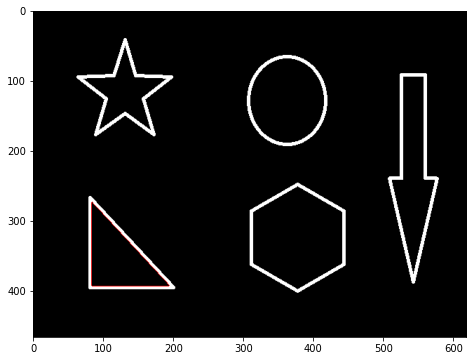

In [80]:
# 第二条曲线的周长和面积
cnt2 = contours[1]

img_contour_draw = img_contour.copy()
img_contour_2 = cv2.drawContours(img_contour_draw, contours, 1, (0,0,255),1)

plt.figure(figsize=(8,6))
cv_show(img_contour_2)

# 周长
print(cv2.arcLength(cnt2,True)) # True 闭合曲线
# 面积
cv2.contourArea(cnt2)

## 轮廓近似

###  正常轮廓

(57436.5, 52526.5, 1265.9625457525253)

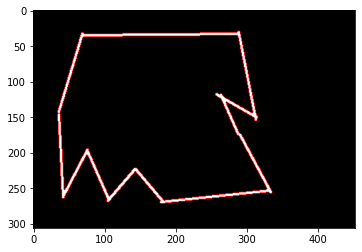

In [90]:
img_contour2 = cv2.imread("01_Picture/11_contours2.png")
img_contour2_gray = cv2.cvtColor(img_contour2, cv2.COLOR_BGR2GRAY)
thresh, img_contour2_binary = cv2.threshold(img_contour2_gray, 127, 255, cv2.THRESH_BINARY)
binary,contours,other = cv2.findContours(img_contour2_binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

img_contour2_draw = img_contour2.copy()
cv2.drawContours(img_contour2_draw, contours, -1, (0,0,255), 1)
cv_show(img_contour2_draw)
cv2.contourArea(contours[0]), cv2.contourArea(contours[1]), cv2.arcLength(contours[0],True)

### 近似轮廓

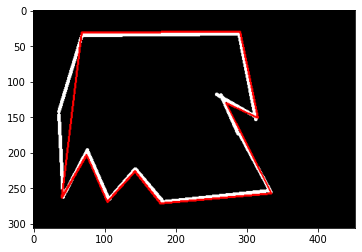

In [95]:
contour_app = contours[0]
epsilon = 0.02 * cv2.arcLength(contour_app, True)  # 阈值
contour_app_ = cv2.approxPolyDP(contour_app, epsilon, True )
img_contour_app_draw = img_contour2.copy()
cv2.drawContours(img_contour_app_draw, [contour_app_,], -1, (0,0,255), 2)
cv_show(img_contour_app_draw)